load 30m poliniex data

In [1]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import quandl
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [52]:
dfs=[]
for infile in glob.glob('./data/poliniex_teachmehowtotrade/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [53]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)

In [54]:
# insert a fake one, the price of one bitcoin in bitcoin = 1
df=dfs[0].copy()
df[:]=1
df.name='BTCBTC'
dfs.insert(0,df)

In [55]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-06-01')]

# also only ones that are in BTC
dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
print([str(min(df.index)) for df in dfs1])

['2014-01-18 04:00:00', '2014-01-18 04:00:00', '2014-01-21 22:30:00', '2014-02-07 20:30:00', '2014-05-19 05:30:00', '2014-08-14 03:30:00']


In [56]:
# reindex
mi = dfs1[0].index
for i in range(len(dfs1)):
    df = dfs1[i]
    dfs[i]=df.reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]  =0
    dfs[i].name = df.name

In [57]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair                BTCBTC                   LTCBTC                      \
Price                close high  low open     close      high       low   
date                                                                      
2014-01-18 04:00:00    1.0  1.0  1.0  1.0  0.028000  0.028000  0.028000   
2014-01-18 04:30:00    1.0  1.0  1.0  1.0  0.028500  0.029000  0.028000   
2014-01-18 05:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 05:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 06:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 06:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 07:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 07:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 08:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 08:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 09:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 09:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 10:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 10:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 11:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 11:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 12:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 12:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 13:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 13:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 14:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 14:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 15:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 15:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 16:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 16:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 17:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 17:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 18:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 18:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
...                    ...  ...  ...  ...       ...       ...       ...   
2017-07-13 09:00:00    1.0  1.0  1.0  1.0  0.019103  0.019238  0.019043   
2017-07-13 09:30:00    1.0  1.0  1.0  1.0  0.019013  0.019128  0.019005   
2017-07-13 10:00:00    1.0  1.0  1.0  1.0  0.019098  0.019100  0.019000   
2017-07-13 10:30:00    1.0  1.0  1.0  1.0  0.019193  0.019200  0.019087   
2017-07-13 11:00:00    1.0  1.0  1.0  1.0  0.019300  0.019500  0.019193   
2017-07-13 11:30:00    1.0  1.0  1.0  1.0  0.019386  0.019455  0.019300   
2017-07-13 12:00:00    1.0  1.0  1.0  1.0  0.019363  0.019492  0.019345   
2017-07-13 12:30:00    1.0  1.0  1.0  1.0  0.019385  0.019388  0.019257   
2017-07-13 13:00:00    1.0  1.0  1.0  1.0  0.019227  0.019388  0.019086   
2017-07-13 13:30:00    1.0  1.0  1.0  1.0  0.019200  0.019258  0.019135   
2017-07-13 14:00:00    1.0  1.0  1.0  1.0  0.019073  0.019202  0.019037   
2017-07-13 14:30:00    1.0  1.0  1.0  1.0  0.019210  0.019210  0.019036   
2017-07-13 15:00:00    1.0  1.0  1.0  1.0  0.019214  0.019268  0.019150   
2017-07-13 15:30:00    1.0  1.0  1.0  1.0  0.019110  0.019275  0.019100   
2017-07-13 16:00:00    1.0  1.0  1.0  1.0  0.019087  0.019186  0.018950   
2017-07-13 16:30:00    1.0  1.0  1.0  1.0  0.019220  0.019220  0.019085   
2017-07-13 17:00:00    1.0  1.0  1.0  1.0  0.019203  0.019245  0.019101   
2017-07-13 17:30:00    1.0  1.0  1.0  1.0  0.019021  0.019194  0.018983   
2017-07-13 18:00:00    1.0  1.0  1.0  1.0  0.019112  0.019112  0.018986   
2017-07-13 18:30:00    1.

In [58]:
# crop to when they all exist
print(len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
len(df)

61096


51112

In [62]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df

Pair                BTCBTC                   LTCBTC                      \
Price                close high  low open     close      high       low   
date                                                                      
2014-08-14 04:00:00    1.0  1.0  1.0  1.0  0.009234  0.009234  0.009234   
2014-08-14 04:30:00    1.0  1.0  1.0  1.0  0.009040  0.009179  0.009040   
2014-08-14 05:00:00    1.0  1.0  1.0  1.0  0.009040  0.009040  0.009040   
2014-08-14 05:30:00    1.0  1.0  1.0  1.0  0.009235  0.009235  0.009233   
2014-08-14 06:00:00    1.0  1.0  1.0  1.0  0.009237  0.009237  0.009236   
2014-08-14 06:30:00    1.0  1.0  1.0  1.0  0.009255  0.009255  0.009220   
2014-08-14 07:00:00    1.0  1.0  1.0  1.0  0.009359  0.009359  0.009359   
2014-08-14 07:30:00    1.0  1.0  1.0  1.0  0.009359  0.009359  0.009359   
2014-08-14 08:00:00    1.0  1.0  1.0  1.0  0.009500  0.009500  0.009346   
2014-08-14 08:30:00    1.0  1.0  1.0  1.0  0.009541  0.009550  0.009500   
2014-08-14 09:00:00    1.0  1.0  1.0  1.0  0.010222  0.010227  0.009740   
2014-08-14 09:30:00    1.0  1.0  1.0  1.0  0.010143  0.010148  0.010133   
2014-08-14 10:00:00    1.0  1.0  1.0  1.0  0.010041  0.010093  0.010036   
2014-08-14 10:30:00    1.0  1.0  1.0  1.0  0.010052  0.010069  0.010043   
2014-08-14 11:00:00    1.0  1.0  1.0  1.0  0.010083  0.010150  0.010083   
2014-08-14 11:30:00    1.0  1.0  1.0  1.0  0.010105  0.010178  0.010105   
2014-08-14 12:00:00    1.0  1.0  1.0  1.0  0.010150  0.010189  0.010150   
2014-08-14 12:30:00    1.0  1.0  1.0  1.0  0.010098  0.010215  0.010098   
2014-08-14 13:00:00    1.0  1.0  1.0  1.0  0.010120  0.010120  0.010120   
2014-08-14 13:30:00    1.0  1.0  1.0  1.0  0.010120  0.010120  0.010120   
2014-08-14 14:00:00    1.0  1.0  1.0  1.0  0.010030  0.010220  0.009974   
2014-08-14 14:30:00    1.0  1.0  1.0  1.0  0.010034  0.010034  0.010034   
2014-08-14 15:00:00    1.0  1.0  1.0  1.0  0.010000  0.010000  0.010000   
2014-08-14 15:30:00    1.0  1.0  1.0  1.0  0.009987  0.010000  0.009921   
2014-08-14 16:00:00    1.0  1.0  1.0  1.0  0.009987  0.009987  0.009987   
2014-08-14 16:30:00    1.0  1.0  1.0  1.0  0.009919  0.009998  0.009919   
2014-08-14 17:00:00    1.0  1.0  1.0  1.0  0.009980  0.009980  0.009974   
2014-08-14 17:30:00    1.0  1.0  1.0  1.0  0.009980  0.009980  0.009980   
2014-08-14 18:00:00    1.0  1.0  1.0  1.0  0.009980  0.009980  0.009980   
2014-08-14 18:30:00    1.0  1.0  1.0  1.0  0.009950  0.009950  0.009807   
...                    ...  ...  ...  ...       ...       ...       ...   
2017-07-13 09:00:00    1.0  1.0  1.0  1.0  0.019103  0.019238  0.019043   
2017-07-13 09:30:00    1.0  1.0  1.0  1.0  0.019013  0.019128  0.019005   
2017-07-13 10:00:00    1.0  1.0  1.0  1.0  0.019098  0.019100  0.019000   
2017-07-13 10:30:00    1.0  1.0  1.0  1.0  0.019193  0.019200  0.019087   
2017-07-13 11:00:00    1.0  1.0  1.0  1.0  0.019300  0.019500  0.019193   
2017-07-13 11:30:00    1.0  1.0  1.0  1.0  0.019386  0.019455  0.019300   
2017-07-13 12:00:00    1.0  1.0  1.0  1.0  0.019363  0.019492  0.019345   
2017-07-13 12:30:00    1.0  1.0  1.0  1.0  0.019385  0.019388  0.019257   
2017-07-13 13:00:00    1.0  1.0  1.0  1.0  0.019227  0.019388  0.019086   
2017-07-13 13:30:00    1.0  1.0  1.0  1.0  0.019200  0.019258  0.019135   
2017-07-13 14:00:00    1.0  1.0  1.0  1.0  0.019073  0.019202  0.019037   
2017-07-13 14:30:00    1.0  1.0  1.0  1.0  0.019210  0.019210  0.019036   
2017-07-13 15:00:00    1.0  1.0  1.0  1.0  0.019214  0.019268  0.019150   
2017-07-13 15:30:00    1.0  1.0  1.0  1.0  0.019110  0.019275  0.019100   
2017-07-13 16:00:00    1.0  1.0  1.0  1.0  0.019087  0.019186  0.018950   
2017-07-13 16:30:00    1.0  1.0  1.0  1.0  0.019220  0.019220  0.019085   
2017-07-13 17:00:00    1.0  1.0  1.0  1.0  0.019203  0.019245  0.019101   
2017-07-13 17:30:00    1.0  1.0  1.0  1.0  0.019021  0.019194  0.018983   
2017-07-13 18:00:00    1.0  1.0  1.0  1.0  0.019112  0.019112  0.018986   
2017-07-13 18:30:00    1.

In [64]:
# split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 7665 train#: 43447 test_frac: 0.14996478322116136 cutoff_time: 2017-02-04 07:00:00


In [67]:
# save
df_train.to_hdf('./data/poliniex_30m.hf',key='train')
df_test.to_hdf('./data/poliniex_30m.hf',key='test')
df_train

Pair                BTCBTC                   LTCBTC                      \
Price                close high  low open     close      high       low   
date                                                                      
2014-08-14 04:00:00    1.0  1.0  1.0  1.0  0.009234  0.009234  0.009234   
2014-08-14 04:30:00    1.0  1.0  1.0  1.0  0.009040  0.009179  0.009040   
2014-08-14 05:00:00    1.0  1.0  1.0  1.0  0.009040  0.009040  0.009040   
2014-08-14 05:30:00    1.0  1.0  1.0  1.0  0.009235  0.009235  0.009233   
2014-08-14 06:00:00    1.0  1.0  1.0  1.0  0.009237  0.009237  0.009236   
2014-08-14 06:30:00    1.0  1.0  1.0  1.0  0.009255  0.009255  0.009220   
2014-08-14 07:00:00    1.0  1.0  1.0  1.0  0.009359  0.009359  0.009359   
2014-08-14 07:30:00    1.0  1.0  1.0  1.0  0.009359  0.009359  0.009359   
2014-08-14 08:00:00    1.0  1.0  1.0  1.0  0.009500  0.009500  0.009346   
2014-08-14 08:30:00    1.0  1.0  1.0  1.0  0.009541  0.009550  0.009500   
2014-08-14 09:00:00    1.0  1.0  1.0  1.0  0.010222  0.010227  0.009740   
2014-08-14 09:30:00    1.0  1.0  1.0  1.0  0.010143  0.010148  0.010133   
2014-08-14 10:00:00    1.0  1.0  1.0  1.0  0.010041  0.010093  0.010036   
2014-08-14 10:30:00    1.0  1.0  1.0  1.0  0.010052  0.010069  0.010043   
2014-08-14 11:00:00    1.0  1.0  1.0  1.0  0.010083  0.010150  0.010083   
2014-08-14 11:30:00    1.0  1.0  1.0  1.0  0.010105  0.010178  0.010105   
2014-08-14 12:00:00    1.0  1.0  1.0  1.0  0.010150  0.010189  0.010150   
2014-08-14 12:30:00    1.0  1.0  1.0  1.0  0.010098  0.010215  0.010098   
2014-08-14 13:00:00    1.0  1.0  1.0  1.0  0.010120  0.010120  0.010120   
2014-08-14 13:30:00    1.0  1.0  1.0  1.0  0.010120  0.010120  0.010120   
2014-08-14 14:00:00    1.0  1.0  1.0  1.0  0.010030  0.010220  0.009974   
2014-08-14 14:30:00    1.0  1.0  1.0  1.0  0.010034  0.010034  0.010034   
2014-08-14 15:00:00    1.0  1.0  1.0  1.0  0.010000  0.010000  0.010000   
2014-08-14 15:30:00    1.0  1.0  1.0  1.0  0.009987  0.010000  0.009921   
2014-08-14 16:00:00    1.0  1.0  1.0  1.0  0.009987  0.009987  0.009987   
2014-08-14 16:30:00    1.0  1.0  1.0  1.0  0.009919  0.009998  0.009919   
2014-08-14 17:00:00    1.0  1.0  1.0  1.0  0.009980  0.009980  0.009974   
2014-08-14 17:30:00    1.0  1.0  1.0  1.0  0.009980  0.009980  0.009980   
2014-08-14 18:00:00    1.0  1.0  1.0  1.0  0.009980  0.009980  0.009980   
2014-08-14 18:30:00    1.0  1.0  1.0  1.0  0.009950  0.009950  0.009807   
...                    ...  ...  ...  ...       ...       ...       ...   
2017-02-03 16:30:00    1.0  1.0  1.0  1.0  0.003949  0.003970  0.003949   
2017-02-03 17:00:00    1.0  1.0  1.0  1.0  0.003951  0.003968  0.003949   
2017-02-03 17:30:00    1.0  1.0  1.0  1.0  0.003960  0.003970  0.003951   
2017-02-03 18:00:00    1.0  1.0  1.0  1.0  0.003961  0.003965  0.003951   
2017-02-03 18:30:00    1.0  1.0  1.0  1.0  0.003977  0.003977  0.003961   
2017-02-03 19:00:00    1.0  1.0  1.0  1.0  0.003983  0.004085  0.003962   
2017-02-03 19:30:00    1.0  1.0  1.0  1.0  0.003969  0.003982  0.003969   
2017-02-03 20:00:00    1.0  1.0  1.0  1.0  0.003976  0.003986  0.003969   
2017-02-03 20:30:00    1.0  1.0  1.0  1.0  0.003976  0.004000  0.003965   
2017-02-03 21:00:00    1.0  1.0  1.0  1.0  0.003982  0.004015  0.003976   
2017-02-03 21:30:00    1.0  1.0  1.0  1.0  0.003976  0.003999  0.003976   
2017-02-03 22:00:00    1.0  1.0  1.0  1.0  0.003989  0.003991  0.003968   
2017-02-03 22:30:00    1.0  1.0  1.0  1.0  0.003974  0.003975  0.003969   
2017-02-03 23:00:00    1.0  1.0  1.0  1.0  0.003972  0.003989  0.003961   
2017-02-03 23:30:00    1.0  1.0  1.0  1.0  0.003967  0.003990  0.003966   
2017-02-04 00:00:00    1.0  1.0  1.0  1.0  0.003961  0.003979  0.003961   
2017-02-04 00:30:00    1.0  1.0  1.0  1.0  0.003952  0.003977  0.003952   
2017-02-04 01:00:00    1.0  1.0  1.0  1.0  0.003942  0.003966  0.003942   
2017-02-04 01:30:00    1.0  1.0  1.0  1.0  0.003966  0.003966  0.003942   
2017-02-04 02:00:00    1.

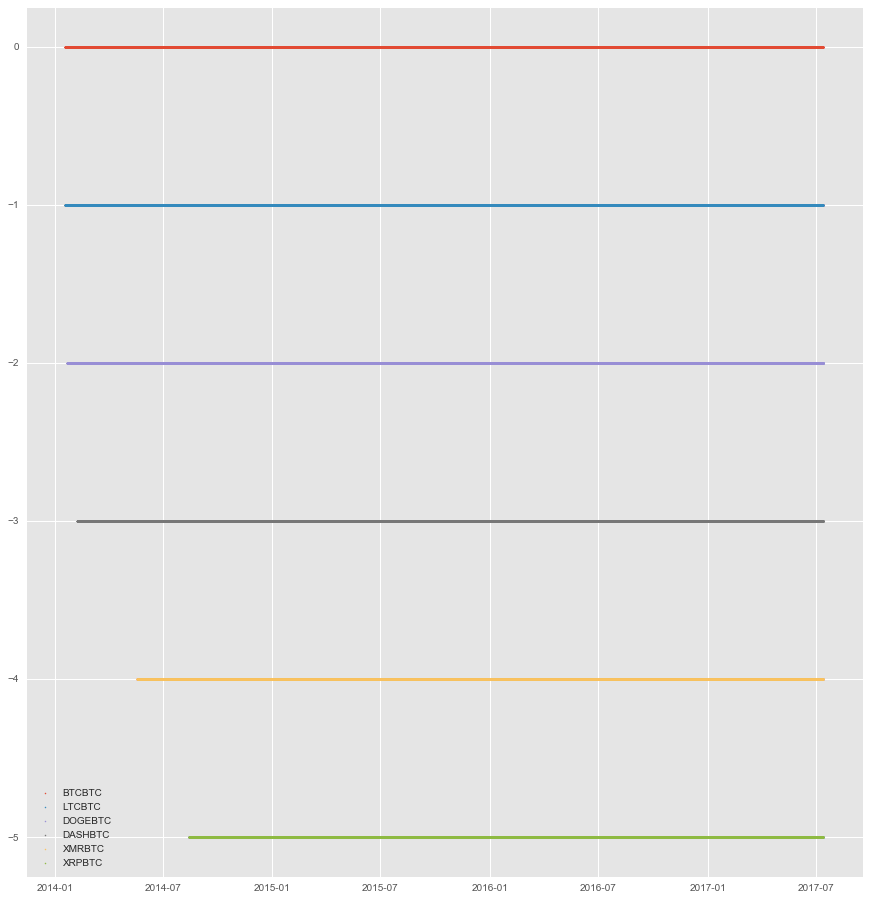

In [51]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()